# Gradient Descent

### Implementing `Batch` vs `Mini-batch` vs `Stochastic` Gradient Descent

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

### Functions for Perceptron with 3 types of Gradient Descent

In [68]:
# linear regression using gradient descent
# function to compute hypothesis / predictions
def hypothesis(X, weights, bias):
    return np.dot(X, weights) + bias
  
# function to compute gradient of error function w.r.t. weights
def gradient(X, y, weights, bias, learning_rate):
    h = hypothesis(X, weights, bias)
    grad_w = learning_rate * np.dot(X.T, (h - y))
    grad_b = learning_rate * np.sum(h - y)
    return grad_w, grad_b

def cost(X, y, weights, bias):
    h = hypothesis(X, weights, bias)
    m = len(y)
    J = (1/2*m) * np.sum(np.square(h - y))
    return J

def iterate_minibatches(X, y, batch_size, shuffle=False):
    assert X.shape[0] == y.shape[0]
    if shuffle:
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)
    for start_idx in range(0, X.shape[0], batch_size):
        end_idx = min(start_idx + batch_size, X.shape[0])
        if shuffle:
            excerpt = indices[start_idx:end_idx]
        else:
            excerpt = slice(start_idx, end_idx)
        yield X[excerpt], y[excerpt]


def random_sample_batches(X, y, batch_size):
    assert X.shape[0] == y.shape[0]
    indexes = np.random.randint(0, X.shape[0], batch_size) # random sample indexes
    X_tr = X[indexes, :]
    y_tr = y[indexes]
    return X_tr, y_tr
    

# function to perform batch gradient descent
def batch_gradient_descent(X, y, learning_rate = 0.001, epochs = 10):
    weights = np.zeros((X.shape[1], 1))
    bias = 0
    error_list = []
    for _ in range(epochs):
        grad_w, grad_b = gradient(X, y, weights, bias, learning_rate)
        weights = weights - grad_w
        bias = bias - grad_b
        J = cost(X, y, weights, bias)
        print("Epoch: {}, Cost: {}".format(_, J))
        error_list.append(J)

    return weights, bias, error_list

# function to perform stochastic gradient descent
def stochastic_gradient_descent(X, y, learning_rate = 0.001, epochs = 10, batch_size=32):
    weights = np.zeros((X.shape[1], 1))
    bias = 0
    error_list = []    
    for _ in range(epochs):
        X_tr, y_tr = random_sample_batches(X, y, batch_size)
        grad_w, grad_b = gradient(X_tr,y_tr, weights, bias, learning_rate)
        weights = weights - grad_w
        bias = bias - grad_b
        J = cost(X_tr,y_tr, weights, bias)
        error_list.append(J)
        print("Epoch: {}, Cost: {}".format(_, J))
  
    return weights, error_list

# function to perform mini-batch gradient descent
def mini_batch_gradient_descent(X, y, learning_rate = 0.001, batch_size = 32, epochs = 10):
    weights = np.zeros((X.shape[1], 1))
    bias = 0
    error_list = []
    for _ in range(epochs):
        mini_batches = iterate_minibatches(X, y, batch_size, shuffle=True)
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            grad_w, grad_b = gradient(X_mini, y_mini, weights, bias, learning_rate)
            weights = weights - grad_w
            bias = bias - grad_b
            J = []
            J.append(cost(X_mini, y_mini, weights, bias))
        error_list.append(np.sum(np.array(J))/batch_size)
        print("Epoch: {}, Cost: {}".format(_, error_list[_]))
  
    return weights, bias, error_list

### Defining the Data

In [45]:
X, y = datasets.make_regression(
        n_samples=100, n_features=1, noise=20, random_state=4)

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = y.reshape(-1, 1)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234)

In [47]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(80, 1) (20, 1) (80, 1) (20, 1)


### Batch Gradient Descent

In [75]:
weights, bias, error_list = batch_gradient_descent(X, y, learning_rate = 0.001, epochs=1000)

Epoch: 0, Cost: 27804067.855405882
Epoch: 1, Cost: 27577558.032990877
Epoch: 2, Cost: 27366210.4445191
Epoch: 3, Cost: 27166700.41340484
Epoch: 4, Cost: 26976484.111680724
Epoch: 5, Cost: 26793614.811231453
Epoch: 6, Cost: 26616602.376933843
Epoch: 7, Cost: 26444305.825497966
Epoch: 8, Cost: 26275851.168591436
Epoch: 9, Cost: 26110568.59004561
Epoch: 10, Cost: 25947944.407215428
Epoch: 11, Cost: 25787584.33730845
Epoch: 12, Cost: 25629185.4082622
Epoch: 13, Cost: 25472514.47983111
Epoch: 14, Cost: 25317391.81928938
Epoch: 15, Cost: 25163678.542237222
Epoch: 16, Cost: 25011267.00892824
Epoch: 17, Cost: 24860073.480589468
Epoch: 18, Cost: 24710032.50388587
Epoch: 19, Cost: 24561092.616841953
Epoch: 20, Cost: 24413213.065239556
Epoch: 21, Cost: 24266361.29169498
Epoch: 22, Cost: 24120511.015579414
Epoch: 23, Cost: 23975640.764738858
Epoch: 24, Cost: 23831732.752690893
Epoch: 25, Cost: 23688772.01999694
Epoch: 26, Cost: 23546745.777641412
Epoch: 27, Cost: 23405642.90487938
Epoch: 28, Cost:

Bias =  -171.22125298660305
Weights = 
 [[349.23492158]]


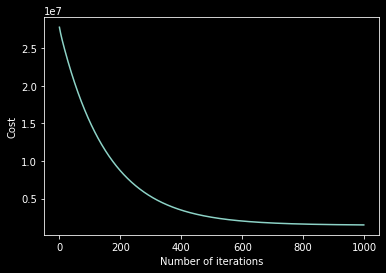

In [76]:
print("Bias = ", bias)
print("Weights = \n", weights)
  
# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

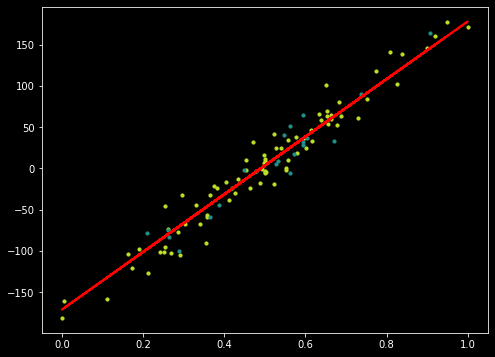

Mean absolute error =  14.05972755752251


In [53]:
y_pred = hypothesis(X, weights, bias)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred, color="red", linewidth=2, label="Prediction")
plt.show()

# calculating error in predictions
error = np.sum(np.abs(y - y_pred) / y.shape[0])
print("Mean absolute error = ", error)

### Stochastic Gradient Descent

In [69]:
theta, error_list = stochastic_gradient_descent(X, y, learning_rate = 0.001, batch_size=32, epochs=1000)

Epoch: 0, Cost: 3717778.1785841845
Epoch: 1, Cost: 2292382.2106570294
Epoch: 2, Cost: 3394078.0961498707
Epoch: 3, Cost: 3306592.894903249
Epoch: 4, Cost: 2991788.0092041325
Epoch: 5, Cost: 3214099.475477753
Epoch: 6, Cost: 2692571.7753963033
Epoch: 7, Cost: 3714299.166999531
Epoch: 8, Cost: 3642251.549588602
Epoch: 9, Cost: 3746079.671097709
Epoch: 10, Cost: 2542809.191892689
Epoch: 11, Cost: 4553974.813254337
Epoch: 12, Cost: 2821539.3360057063
Epoch: 13, Cost: 2198234.2891800106
Epoch: 14, Cost: 2124609.0033092033
Epoch: 15, Cost: 4326042.995173925
Epoch: 16, Cost: 3210793.062810544
Epoch: 17, Cost: 2930201.8418012997
Epoch: 18, Cost: 2611645.5222328734
Epoch: 19, Cost: 2745785.4942053156
Epoch: 20, Cost: 2294317.4837395637
Epoch: 21, Cost: 3498124.6832948388
Epoch: 22, Cost: 3107513.790693066
Epoch: 23, Cost: 2632503.108704819
Epoch: 24, Cost: 3829342.8568685926
Epoch: 25, Cost: 3382703.750789475
Epoch: 26, Cost: 1982468.1318061398
Epoch: 27, Cost: 2187234.93801809
Epoch: 28, Cost:

Bias =  -171.22320147023208
Weights = 
 [[349.18291919]]


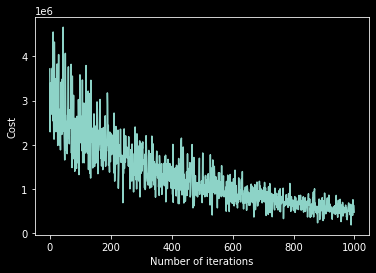

In [70]:
print("Bias = ", bias)
print("Weights = \n", weights)
  
# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

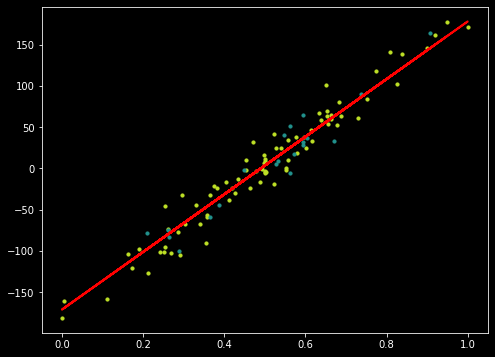

Mean absolute error =  14.05989757951293


In [71]:
y_pred = hypothesis(X, weights, bias)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred, color="red", linewidth=2, label="Prediction")
plt.show()

# calculating error in predictions
error = np.sum(np.abs(y - y_pred) / y.shape[0])
print("Mean absolute error = ", error)

### Mini-Batch Gradient Descent 

In [72]:
weights, bias, error_list = mini_batch_gradient_descent(X, y, learning_rate = 0.001, batch_size=32, epochs=1000)

Epoch: 0, Cost: 2009.8562868468762
Epoch: 1, Cost: 1342.7820992054315
Epoch: 2, Cost: 696.4824439032569
Epoch: 3, Cost: 1857.8836610013677
Epoch: 4, Cost: 3584.102536826541
Epoch: 5, Cost: 691.365796554479
Epoch: 6, Cost: 29.746225975452184
Epoch: 7, Cost: 1042.5324244840629
Epoch: 8, Cost: 155.89996025734007
Epoch: 9, Cost: 550.292734987315
Epoch: 10, Cost: 58.32782009932395
Epoch: 11, Cost: 346.0117050773801
Epoch: 12, Cost: 1159.6971493544215
Epoch: 13, Cost: 378.711381610022
Epoch: 14, Cost: 2184.873842835011
Epoch: 15, Cost: 429.7007942123025
Epoch: 16, Cost: 1560.2107758122295
Epoch: 17, Cost: 727.2133307488652
Epoch: 18, Cost: 396.5851437597979
Epoch: 19, Cost: 398.9574235509307
Epoch: 20, Cost: 693.8048166911789
Epoch: 21, Cost: 144.99733771400386
Epoch: 22, Cost: 256.1927551740555
Epoch: 23, Cost: 1288.3369599223545
Epoch: 24, Cost: 985.6953449564571
Epoch: 25, Cost: 1715.0437066493273
Epoch: 26, Cost: 1212.347866782664
Epoch: 27, Cost: 2212.8805404334753
Epoch: 28, Cost: 750.

Bias =  -171.19717559705882
Weights = 
 [[349.2091356]]


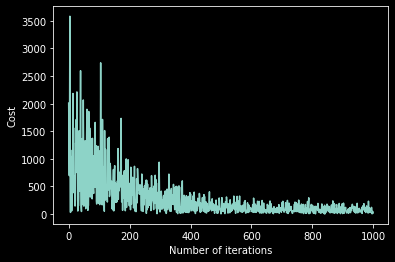

In [73]:
print("Bias = ", bias)
print("Weights = \n", weights)
  
# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

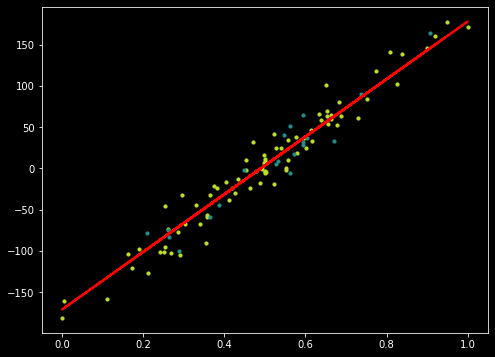

Mean absolute error =  14.060813607599448


In [74]:
y_pred = hypothesis(X, weights, bias)
cmap = plt.get_cmap("viridis")
fig = plt.figure(figsize=(8, 6))
m1 = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred, color="red", linewidth=2, label="Prediction")
plt.show()

# calculating error in predictions
error = np.sum(np.abs(y - y_pred) / y.shape[0])
print("Mean absolute error = ", error)